In [ ]:
#Importamos todas las librerías que vamos a usar:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_txt('/content/drive/MyDrive/Master Ciencia de Datos/Aprendizaje No Supervisado/TP Final/Dataset.csv')

## Exploración y limpieza de datos

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.nunique()

,0
CUST_ID,8950
BALANCE,8871
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47
PURCHASES_INSTALLMENTS_FREQUENCY,47


In [ ]:
df.shape

(8950, 18)

Contamos con un dataset con 8.950 registros de titulares de tarjetas de crédito activos durante 6 meses y 18 features.
El significado de cada feature es el siguiente:


CUST_ID: Identificación del titular de la tarjeta de crédito (categórica).

BALANCE: Saldo restante en su cuenta para realizar compras.

BALANCE_FREQUENCY: Frecuencia con la que se actualiza el saldo, con un puntaje entre 0 y 1 (1 = actualizado frecuentemente, 0 = no actualizado frecuentemente).

PURCHASES: Cantidad total de compras realizadas desde la cuenta.

ONEOFF_PURCHASES: Monto máximo de una compra realizada en una sola vez.

INSTALLMENTS_PURCHASES: Cantidad total de compras realizadas en cuotas.

CASH_ADVANCE: Adelantos en efectivo otorgados al usuario.

PURCHASES_FREQUENCY: Frecuencia con la que se realizan las compras, con un puntaje entre 0 y 1 (1 = se compra frecuentemente, 0 = no se compra frecuentemente).

ONEOFFPURCHASESFREQUENCY: Frecuencia con la que se realizan compras únicas (1 = compras frecuentes, 0 = no frecuentes).

PURCHASESINSTALLMENTSFREQUENCY: Frecuencia con la que se realizan compras en cuotas (1 = realizadas frecuentemente, 0 = no realizadas frecuentemente).

CASHADVANCEFREQUENCY: Frecuencia con la que se solicitan adelantos en efectivo.

CASHADVANCETRX: Número de transacciones realizadas con adelantos en efectivo.

PURCHASES_TRX: Número de transacciones de compra realizadas.

CREDIT_LIMIT: Límite de crédito de la tarjeta asignado al usuario.

PAYMENTS: Monto de los pagos realizados por el usuario.

MINIMUM_PAYMENTS: Monto mínimo de pagos realizados por el usuario.

PRCFULLPAYMENT: Porcentaje del pago total realizado por el usuario.

TENURE: Tiempo de uso del servicio de tarjeta de crédito por parte del usuario.













In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


La columna "CREDIT_LIMIT" tiene 1 solo registro ausente, por lo tanto podemos eliminarlo, dado que asumimos que no tendría sentido que no exista este dato si tiene una tarjeta de crédito.

Tenemos también los 313 registros ausentes de la variable "MINIMUM_PAYMENTS", que representa un 3,5% del total de registros. Procederemos también a eliminarlos, porque deberíamos contar con esa información para el análisis.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

CUST_ID parece ser una identificación única para cada cliente y, por lo tanto, no desempeñará ningún papel en la determinación del clúster asique lo eliminamos.

In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True)

## Identificación de Outliers

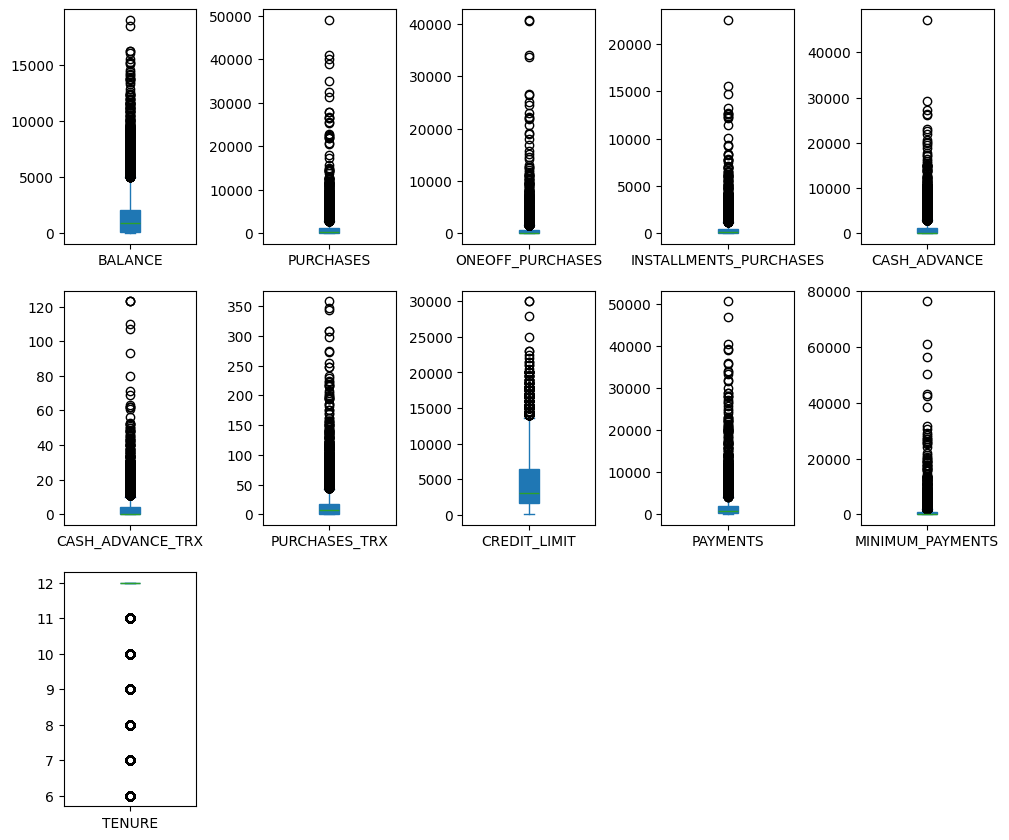

In [ ]:
# Seleccionamos las columnas a graficar
df_to_plot = df.drop(columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']).select_dtypes(include=np.number)

# Subplots
df_to_plot.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

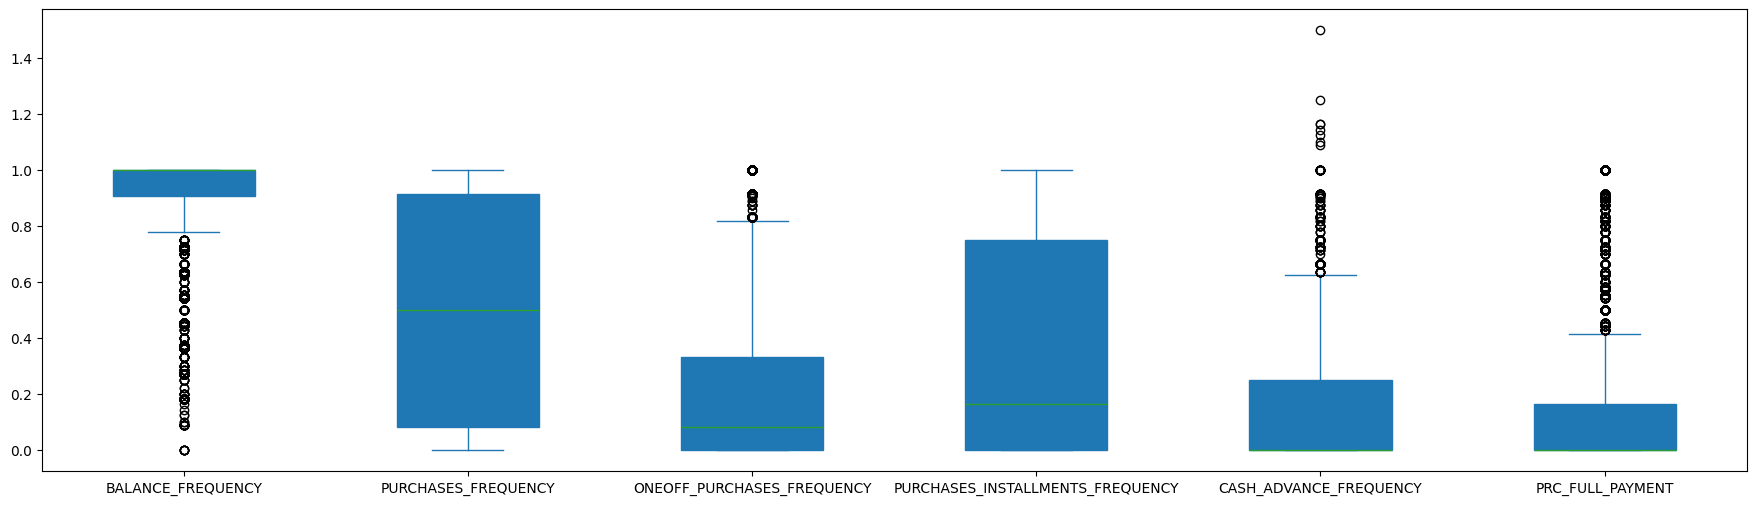

In [ ]:
# Seleccionamos las columnas a graficar (ahora solo con las de frecuencia)
df_to_plot2 = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']].select_dtypes(include=np.number)

# Subplots
df_to_plot2.plot(subplots=False, layout=(2,3), kind='box', figsize=(22,6), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

La columna "CASH_ADVANCE_FREQUENCY" indica con qué frecuencia se paga el efectivo por adelantado. Los valores por encima de 1.0 los consideramos errores de carga en la base de datos. Veamos cuántos son:

In [ ]:
df_borrador = df.loc[df['CASH_ADVANCE_FREQUENCY'] > 1.0]

print("CASH_ADVANCE_FREQUENCY contiene", df_borrador.shape[0], "registros mayores que 1.0.")


CASH_ADVANCE_FREQUENCY contiene 8 registros mayores que 1.0.


Como son pocos, eliminamos esos registros:

In [ ]:
df.drop(df[(df['CASH_ADVANCE_FREQUENCY'] > 1.0)].index, inplace=True)
df.shape

(8628, 17)

Veamos cuántos outliers hay por feature basado en el rango inter quantil (IQR):

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

cant_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_cant_out = pd.DataFrame(cant_out, columns=['cant_out'])
df_cant_out

,cant_out
BALANCE,667
BALANCE_FREQUENCY,1511
PURCHASES,767
ONEOFF_PURCHASES,957
INSTALLMENTS_PURCHASES,810
CASH_ADVANCE,976
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,749
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,333


Si eliminaramos los valores atípicos, perderíamos muchas filas ya que hay demasiados valores atípicos en el conjunto de datos. Por lo tanto, haremos rangos para lidiar con valores extremos:

In [ ]:
df2 = df.copy()

columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:

    Range=c+'_RANGE'
    df2.loc[(df2[c]==0),Range]=0
    df2.loc[((df2[c]>0)&(df2[c]<=500)),Range]=1
    df2.loc[((df2[c]>500)&(df2[c]<=1000)),Range]=2
    df2.loc[((df2[c]>1000)&(df2[c]<=3000)),Range]=3
    df2.loc[((df2[c]>3000)&(df2[c]<=5000)),Range]=4
    df2.loc[((df2[c]>5000)&(df2[c]<=10000)),Range]=5
    df2.loc[((df2[c]>10000)),Range]=6

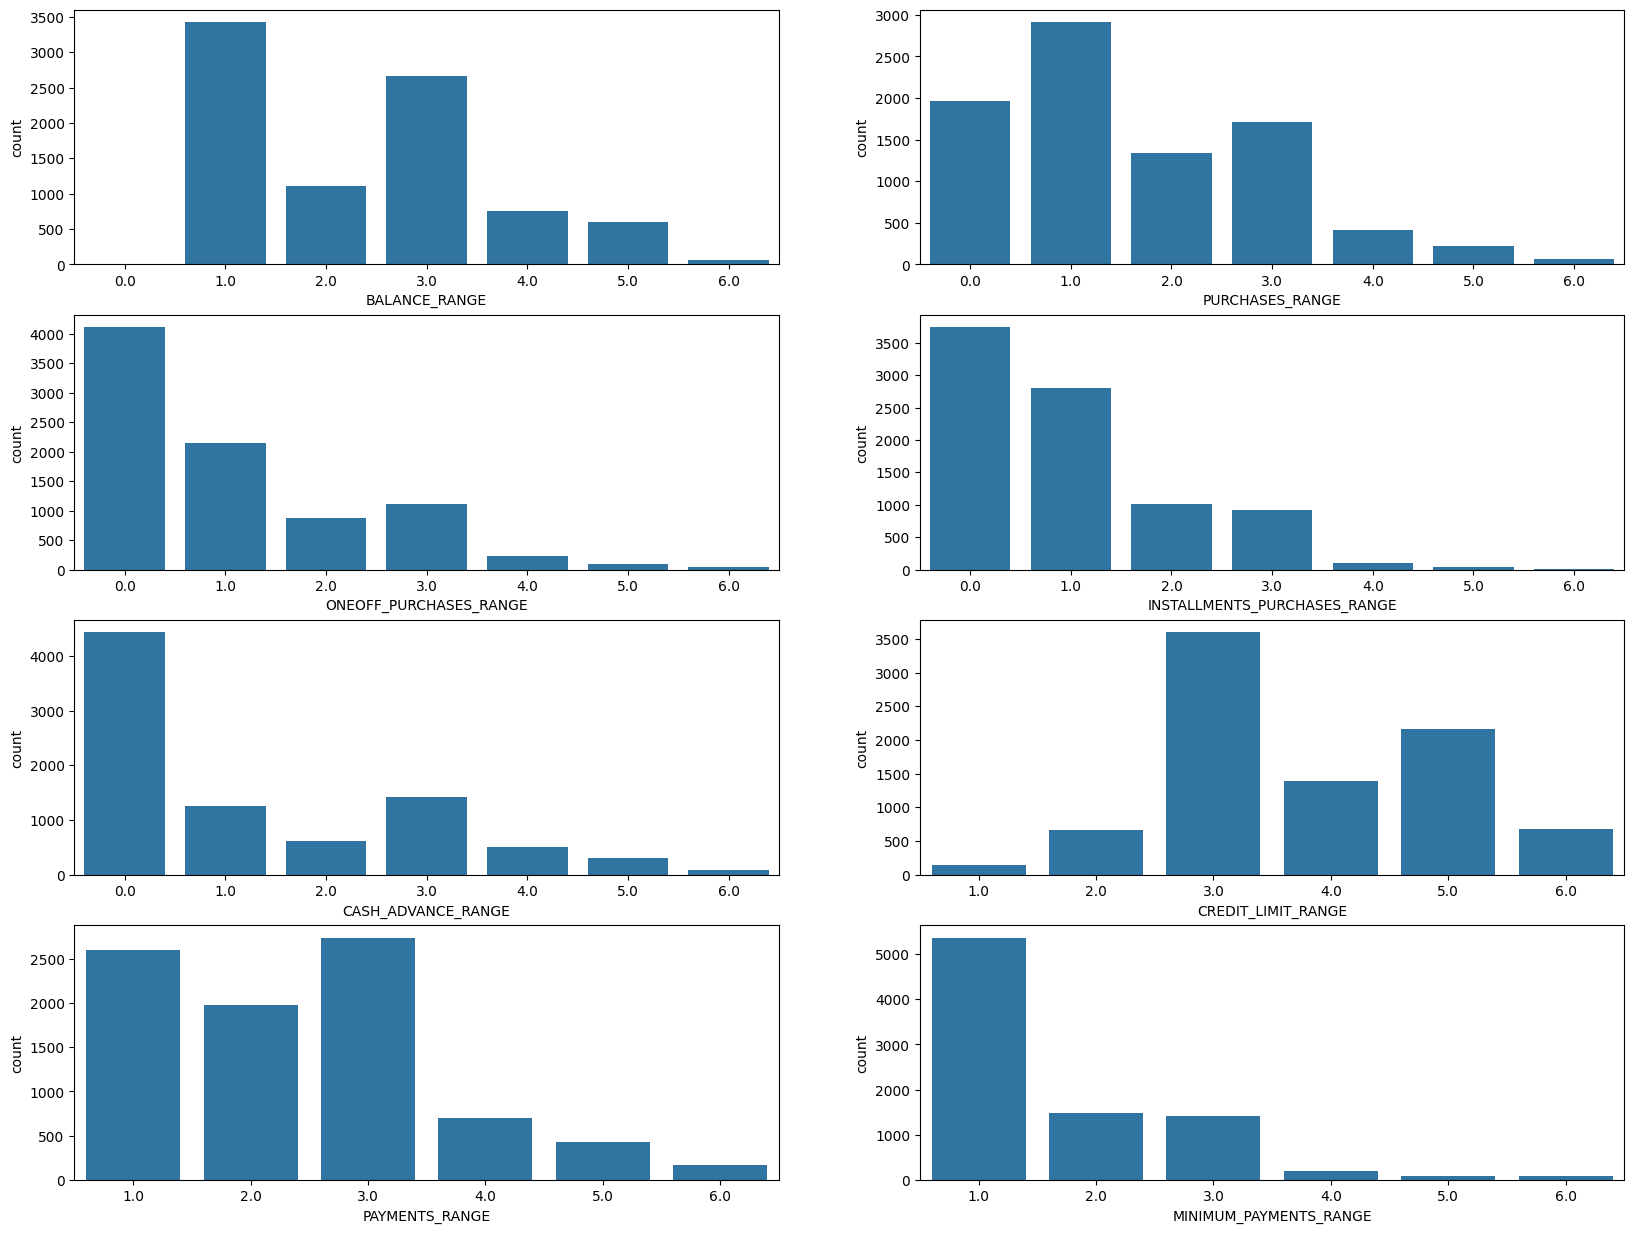

In [ ]:
# Seleccionamos las columnas a graficar
df_to_plot3 = df2[['BALANCE_RANGE', 'PURCHASES_RANGE', 'ONEOFF_PURCHASES_RANGE', 'INSTALLMENTS_PURCHASES_RANGE', 'CASH_ADVANCE_RANGE', 'CREDIT_LIMIT_RANGE','PAYMENTS_RANGE', 'MINIMUM_PAYMENTS_RANGE']].select_dtypes(include=np.number)

# Subplots

plt.figure(figsize=(20, 35))
for i, col in enumerate(df_to_plot3.columns):
    ax = plt.subplot(9, 2, i + 1)
    sns.countplot(x=df_to_plot3[col], ax=ax)
    ax.set_xlabel(col)

### plt.tight_layout()
plt.show()

Se podrían agrupar las features "ONEOFF_PURCHASES_RANGE", "INSTALLMENTS_PURCHASES_RANGE" y "MINIMUM_PAYMENTS_RANGE" en menos categorías porque la 4, 5 y 6 quedaron con pocos registros pero lo vamos a dejar así.

In [ ]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']

for c in columns:

    Range=c+'_RANGE'
    df2[Range]=0
    df2.loc[((df2[c]>0)&(df2[c]<=5)),Range]=1
    df2.loc[((df2[c]>5)&(df2[c]<=10)),Range]=2
    df2.loc[((df2[c]>10)&(df2[c]<=15)),Range]=3
    df2.loc[((df2[c]>15)&(df2[c]<=20)),Range]=4
    df2.loc[((df2[c]>20)&(df2[c]<=30)),Range]=5
    df2.loc[((df2[c]>30)&(df2[c]<=50)),Range]=6
    df2.loc[((df2[c]>50)&(df2[c]<=100)),Range]=7
    df2.loc[((df2[c]>100)),Range]=8

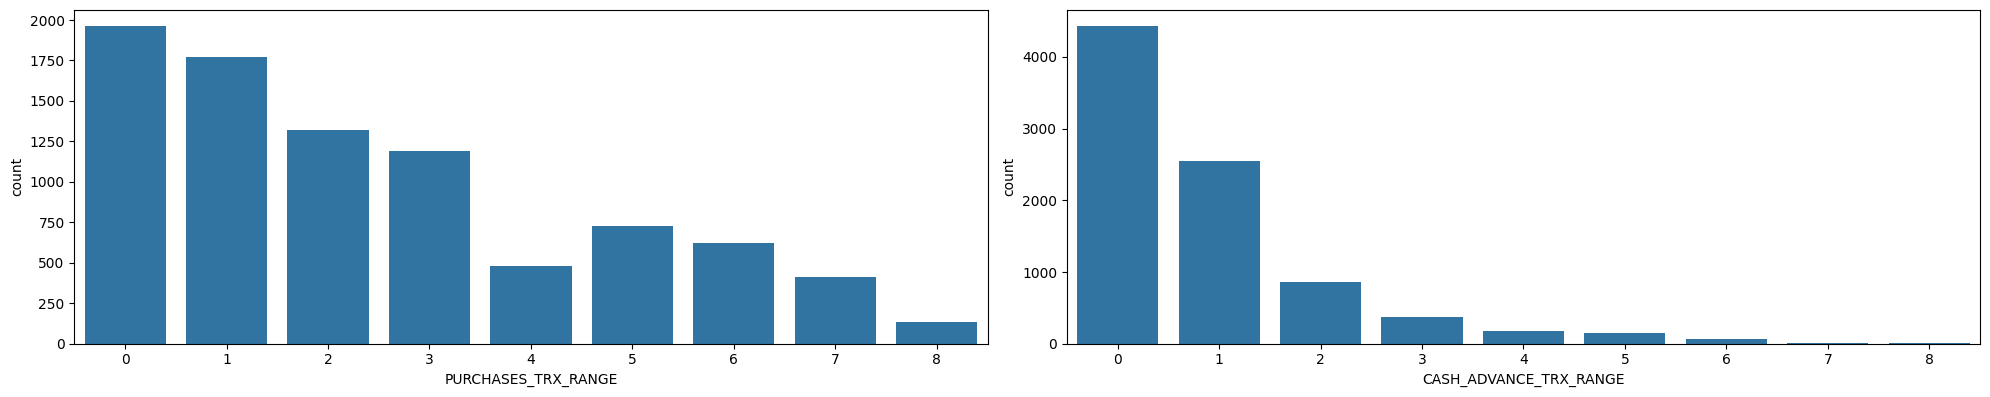

In [ ]:
# Seleccionamos las columnas a graficar
df_to_plot4 = df2[['PURCHASES_TRX_RANGE', 'CASH_ADVANCE_TRX_RANGE']].select_dtypes(include=np.number)

# Subplots

plt.figure(figsize=(20, 35))
for i, col in enumerate(df_to_plot4.columns):
    ax = plt.subplot(9, 2, i + 1)
    sns.countplot(x=df_to_plot4[col], ax=ax)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

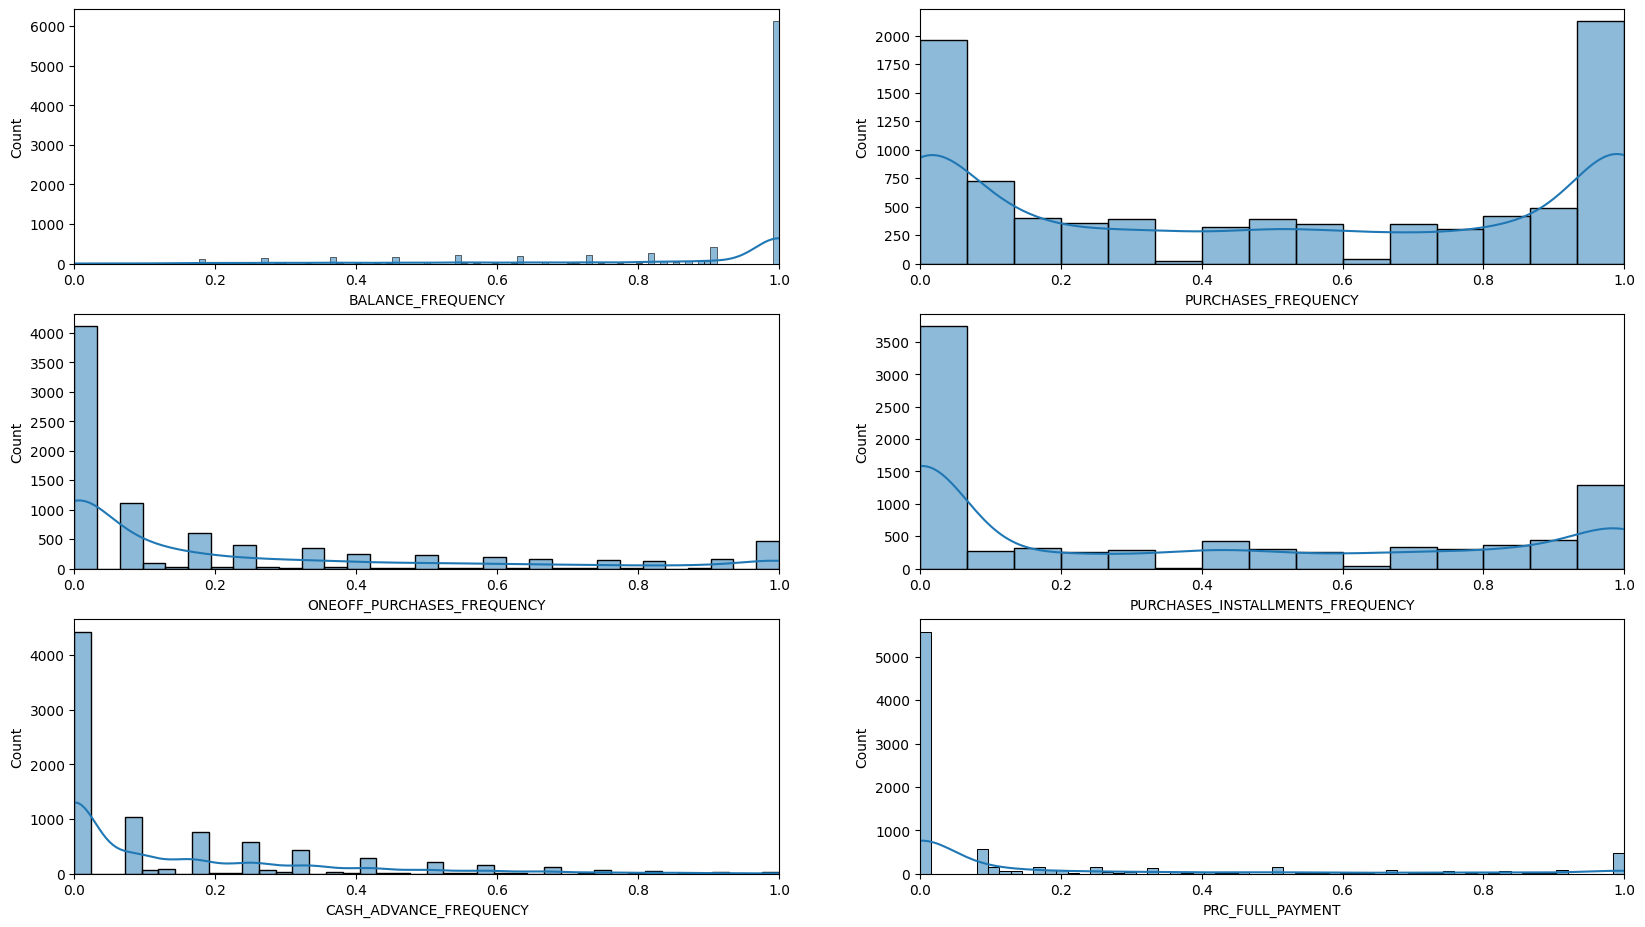

In [ ]:
# Seleccionamos las columnas a graficar
df_to_plot5 = df2[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']].select_dtypes(include=np.number)

# Subplots

plt.figure(figsize=(20, 35))
for i, col in enumerate(df_to_plot5.columns):
    ax = plt.subplot(9, 2, i + 1)
    sns.histplot(x=df_to_plot5[col], ax=ax, kde = True)
    ax.set_xlabel(col)
    plt.xlim(0,1)

plt.show()

Recordemos estas definiciones:

*   PAYMENTS : Monto del pago realizado por el usuario.
*   MINIMUM_PAYMENTS : Monto mínimo de pagos realizados por el usuario.



In [ ]:
# Hay algunas filas en donde los valores de "PAYMENTS" son menores que "MINIMUM_PAYMENTS".

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])]

Shape: (2360, 2)


,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8933,106.138603,337.294767
8939,72.530037,110.950798
8947,81.270775,82.418369
8948,52.549959,55.755628


Identificamos casos en los que la columna PAYMENTS presenta valores más bajos que la columna MINIMUM_PAYMENTS. Asumimos que estos registros son correctos, ya que reflejan una situación común en el uso de tarjetas de crédito. Quizas al momento del vencimiento, se habilite únicamente el pago mínimo para evitar retrasos, pero posteriormente el cliente realice un pago adicional, no total, que sea menor al monto mínimo previamente facturado.

<Axes: >

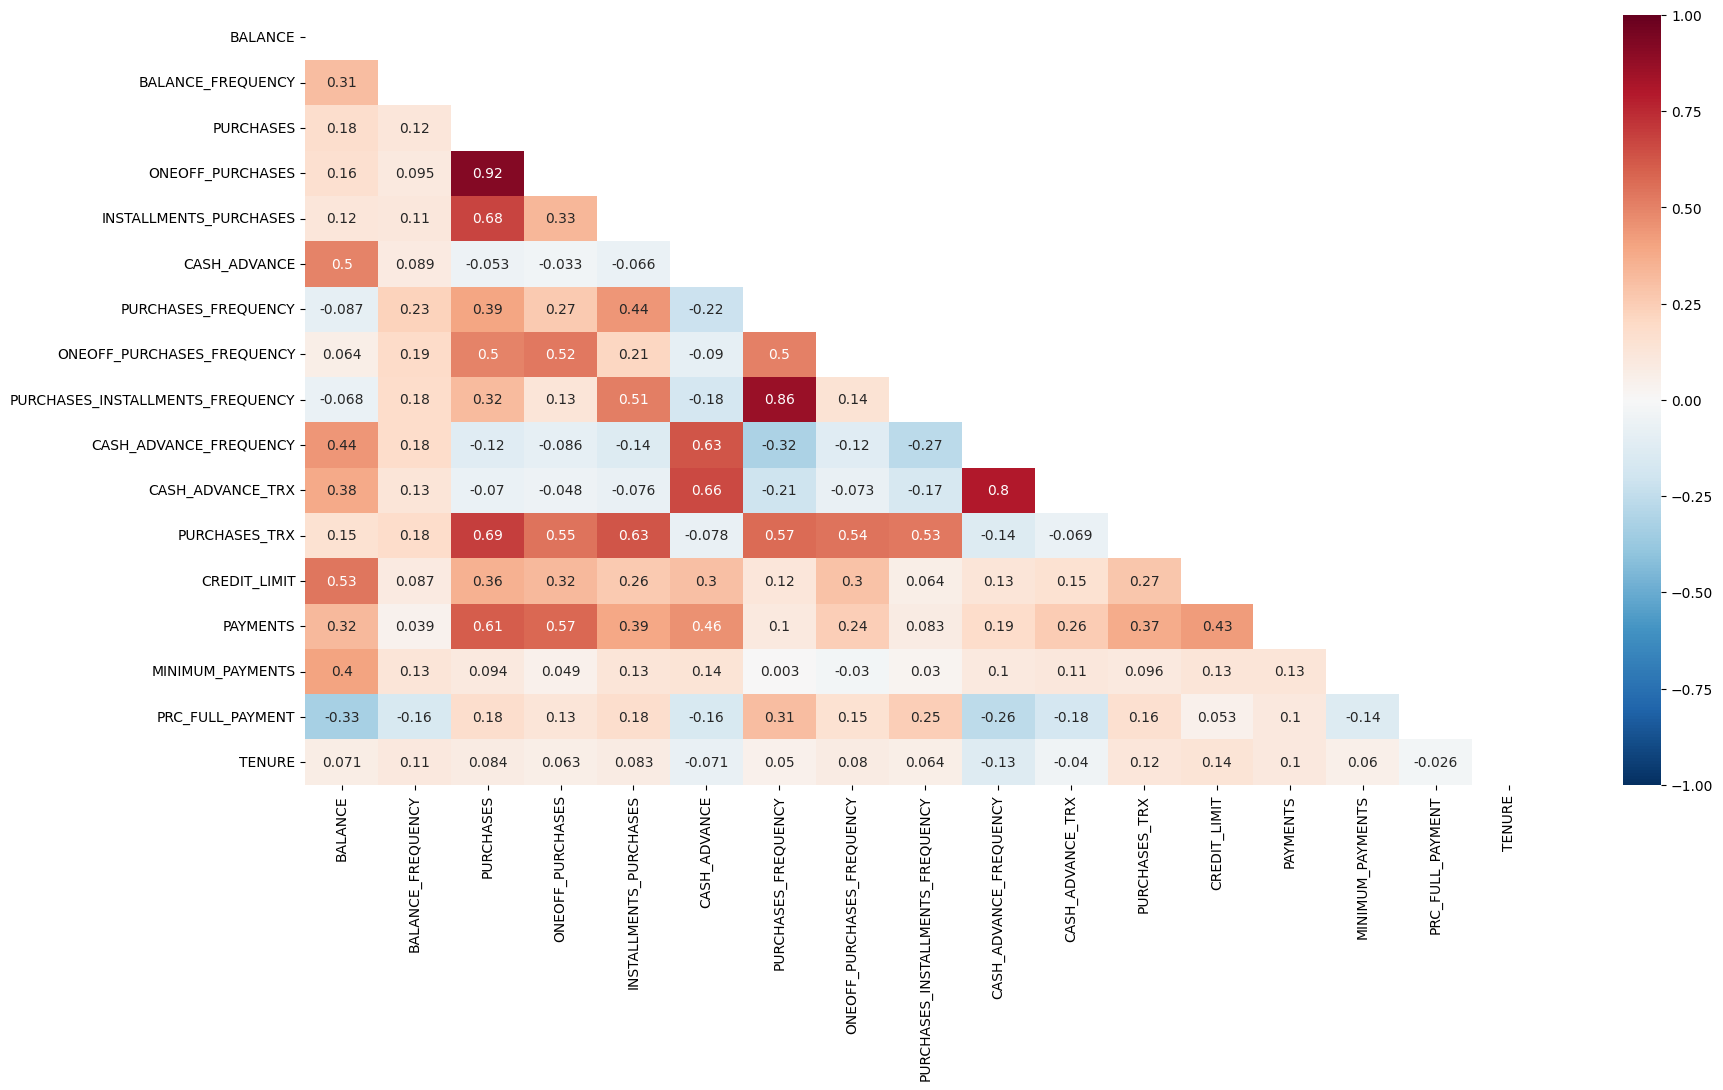

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize = (20,10))

cor = df.corr()
sns.heatmap(cor, mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

Notamos que hay correlaciones altas, como entre PURCHASES y ONEOFF_PURCHASES (correlación de 0.92), y entre CASH_ADVANCE_TRX y CASH_ADVANCE_FREQUENCY (correlación de 0.8) pero no las eliminamos del dataset porque no nos altera los resultados cuando lo corrimos sin ellas, y nos sirven a la hora de los análisis de los clusters

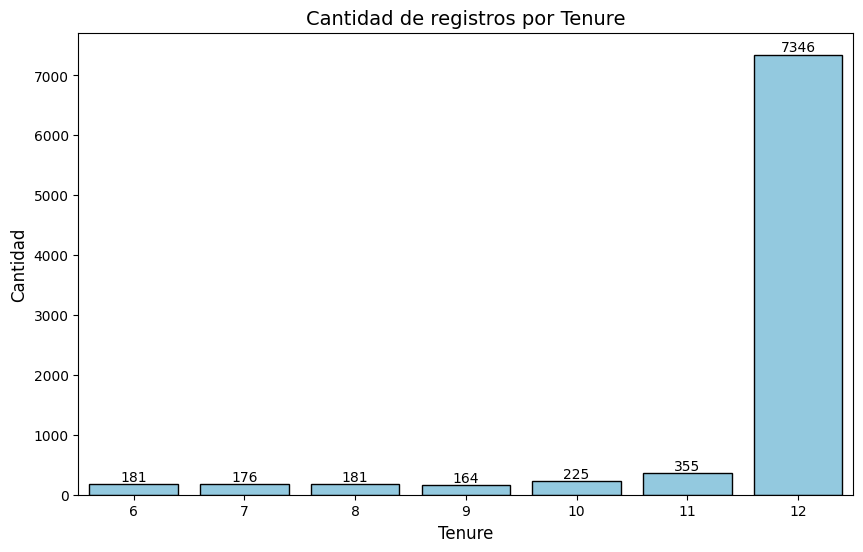

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="TENURE", color="skyblue", edgecolor="black")

# Agregar etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Personalización del gráfico
plt.title("Cantidad de registros por Tenure", fontsize=14)
plt.xlabel("Tenure", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Eliminamos las columnas que ya no vamos a usar:

In [ ]:
df2.drop(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX' ], axis=1, inplace=True)

Elegimos una muestra de 1.000 registros:

In [ ]:
df_sample = df2.sample(n=1000, random_state=42)
print("\nPrimeras 5 filas de la muestra:")
df_sample.head()


Primeras 5 filas de la muestra:


,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
1540,1.00,0.000000,0.000,0.000000,0.083333,0.0,12,4.0,0.0,0.0,0.0,1.0,5.0,3.0,3.0,0,1
6740,1.00,0.857143,0.000,0.714286,0.000000,0.0,7,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2,0
3453,1.00,0.000000,0.000,0.000000,0.083333,0.0,12,3.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,0,1
5903,1.00,0.000000,0.000,0.000000,0.750000,0.3,12,3.0,0.0,0.0,0.0,6.0,6.0,6.0,1.0,0,5
787,0.75,0.125000,0.125,0.000000,0.125000,0.0,8,2.0,1.0,1.0,0.0,3.0,3.0,1.0,1.0,1,1


Estandarizamos las variables:

In [ ]:
from sklearn.preprocessing import StandardScaler
df_model=df_sample.copy()

scaler= StandardScaler()
df_Standardize=pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns)
df_Standardize

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,0.525263,-1.253856,-0.688924,-0.927009,-0.236330,-0.538418,0.332705,1.307162,-1.200093,-0.809369,-0.867029,-0.131600,1.040950,0.437648,1.209678,-1.121170,0.153489
1,0.525263,0.894189,-0.688924,0.865042,-0.672552,-0.538418,-3.628071,-1.036823,-0.483191,-0.809369,0.033313,-0.767351,-0.665525,-1.156699,-0.662889,-0.227095,-0.685247
2,0.525263,-1.253856,-0.688924,-0.927009,-0.236330,-0.538418,0.332705,0.525834,-1.200093,-0.809369,-0.867029,-0.131600,-0.665525,-0.359525,-0.662889,-1.121170,0.153489
3,0.525263,-1.253856,-0.688924,-0.927009,3.253461,0.424875,0.332705,0.525834,-1.200093,-0.809369,-0.867029,3.047153,1.894187,2.829169,-0.662889,-1.121170,3.508429
4,-0.648916,-0.940599,-0.285420,-0.927009,-0.018216,-0.538418,-2.835916,-0.255494,-0.483191,-0.072239,-0.867029,1.139901,-0.665525,-1.156699,-0.662889,-0.674133,0.153489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.525263,-0.000830,-0.688924,0.118354,-0.236330,-0.538418,0.332705,2.088491,-0.483191,-0.809369,0.033313,-0.131600,1.894187,0.437648,1.209678,-0.227095,0.153489
996,0.525263,-1.253856,-0.688924,-0.927009,1.072341,-0.538418,0.332705,0.525834,-1.200093,-0.809369,-0.867029,-0.131600,-0.665525,-1.156699,0.273395,-1.121170,0.153489
997,0.525263,1.252196,-0.419922,1.372790,-0.672552,1.067071,0.332705,-1.036823,0.233710,-0.072239,0.933654,-0.767351,-0.665525,-0.359525,-0.662889,0.219943,-0.685247
998,0.525263,1.252196,-0.688924,1.223452,1.570882,-0.538418,-3.628071,-0.255494,0.233710,-0.809369,0.933654,1.139901,-1.518762,0.437648,0.273395,1.114018,0.992224


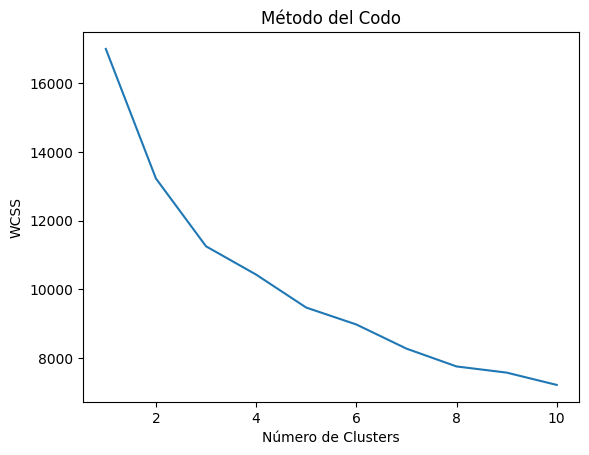

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_Standardize)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

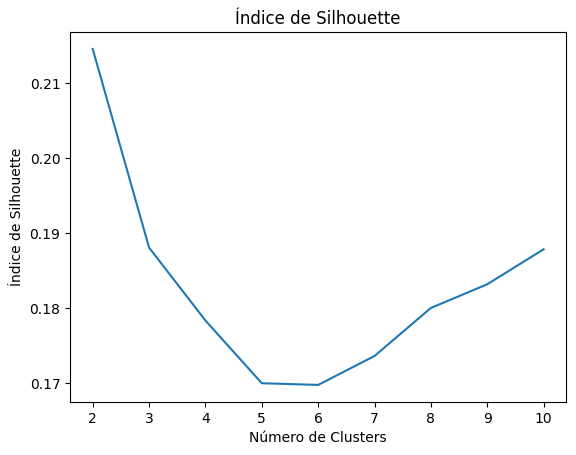

In [ ]:
# Índice de Silhouette
silhouette_avg = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_Standardize)
    silhouette_avg.append(silhouette_score(df_Standardize, cluster_labels))

plt.plot(range(2, 11), silhouette_avg)
plt.title('Índice de Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhouette')
plt.show()

In [ ]:
# Siguiendo el resultado del método de codos optamos por 3 clusters
optimal_k = 3
kmeans3 = KMeans(n_clusters=optimal_k, random_state=42)
df_Standardize['Cluster'] = kmeans3.fit_predict(df_Standardize)

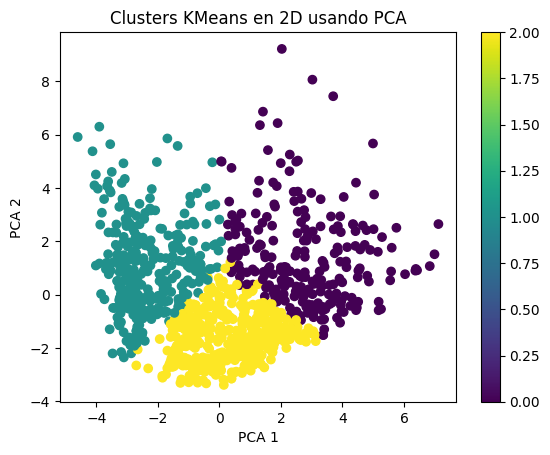

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# df_model2 = df_sample.copy()

components = pca.fit_transform(df_Standardize.drop(columns='Cluster'))

plt.scatter(components[:, 0], components[:, 1], c=df_Standardize['Cluster'], cmap='viridis')
plt.title('Clusters KMeans en 2D usando PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

Considerando las siguientes variables como las más importantes para describir el comportamiento de los usuarios, analizaremos los resultados de las mismas entre clusters

BALANCE_FREQUENCY: Frecuencia con la que se actualiza el saldo, con un puntaje entre 0 y 1 (1 = actualizado frecuentemente, 0 = no actualizado frecuentemente).

PURCHASESINSTALLMENTSFREQUENCY: Frecuencia con la que se realizan compras en cuotas (1 = realizadas frecuentemente, 0 = no realizadas frecuentemente).

CREDIT_LIMIT: Límite de crédito de la tarjeta asignado al usuario.

PURCHASES: Cantidad total de compras realizadas desde la cuenta.

ONEOFF_PURCHASES: Monto máximo de una compra realizada en una sola vez.

CASH_ADVANCE: Adelantos en efectivo otorgados al usuario.

PRCFULLPAYMENT: Porcentaje del pago total realizado por el usuario.

In [ ]:
# Análisis de los clusters para las columnas especificadas
cluster_summary = df_Standardize.groupby('Cluster')[
    [   # Changed from tuple to list using square brackets
        'BALANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CREDIT_LIMIT_RANGE',
        'PURCHASES_RANGE', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE_RANGE','ONEOFF_PURCHASES_RANGE'
    ]
].mean()

# Mostramos las primeras filas del resumen
print(cluster_summary)
#cluster_summary.head()

         BALANCE_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                        
0                 0.398700                          0.778809   
1                 0.121712                         -0.771018   
2                -0.343366                          0.168277   

         CREDIT_LIMIT_RANGE  PURCHASES_RANGE  PRC_FULL_PAYMENT  \
Cluster                                                          
0                  0.592058         1.270194          0.037889   
1                 -0.047491        -0.874229         -0.440797   
2                 -0.320068        -0.044308          0.343604   

         CASH_ADVANCE_RANGE  ONEOFF_PURCHASES_RANGE  
Cluster                                              
0                 -0.052451                1.129669  
1                  0.854652               -0.547807  
2                 -0.678966               -0.230452  


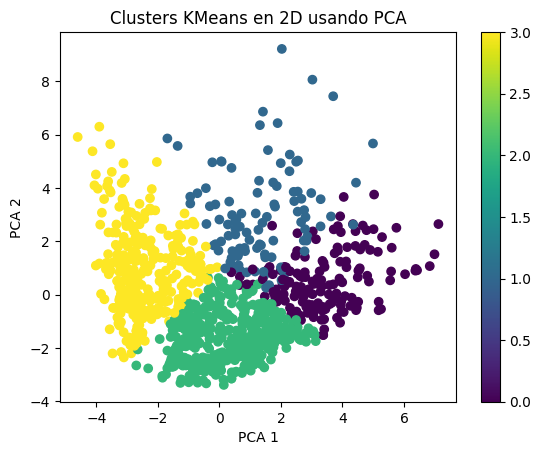

         BALANCE_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                        
0                 0.388179                          0.768506   
1                 0.428736                          0.747168   
2                -0.347624                          0.162226   
3                 0.105763                         -0.823484   

         CREDIT_LIMIT_RANGE  PURCHASES_RANGE  PRC_FULL_PAYMENT  \
Cluster                                                          
0                  0.580719         1.398131          0.266281   
1                  0.635451         0.829945         -0.424040   
2                 -0.320466        -0.043914          0.347927   
3                 -0.089721        -0.909814         -0.438842   

         CASH_ADVANCE_RANGE  ONEOFF_PURCHASES_RANGE  
Cluster                                              
0                 -0.593965                1.402022  
1                  1.127312                0.467837  
2 

In [ ]:
# con K=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_Standardize['Cluster'] = kmeans.fit_predict(df_Standardize)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# df_model2 = df_sample.copy()

components = pca.fit_transform(df_Standardize.drop(columns='Cluster'))

plt.scatter(components[:, 0], components[:, 1], c=df_Standardize['Cluster'], cmap='viridis')
plt.title('Clusters KMeans en 2D usando PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

# Análisis de los clusters para las columnas especificadas
cluster_summary = df_Standardize.groupby('Cluster')[
    [   # Changed from tuple to list using square brackets
        'BALANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CREDIT_LIMIT_RANGE',
        'PURCHASES_RANGE', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE_RANGE','ONEOFF_PURCHASES_RANGE'
    ]
].mean()

# Mostramos las primeras filas del resumen
print(cluster_summary)
#cluster_summary.head()